<a href="https://colab.research.google.com/github/marquestfelipe/MVP_Machine_Learning_Analytics/blob/main/MVP_Machine_Learning_Analytics_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Machine Learning & Analytics
Por: Felipe Teixeira Marques

## 1. Definição do Problema

A ideia inicial do projeto era utilizar informações reais da empresa Bemobi, contudo devido a ausência de dados históricos notou-se a necessidade de se usar uma base de dados mais robusta, obtida através do Kaggle (https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data).

O problema consiste em desenvolver um modelo de machine learning capaz de prever o turnover de funcionários na IBM (uma vez que o dataset disponibilizado pertence a IBM). O turnover, ou rotatividade de pessoal, refere-se à taxa na qual os funcionários deixam a empresa e precisam ser substituídos. Prever o turnover é crucial para o departamento de RH, pois permite identificar antecipadamente os funcionários que estão em risco de deixar a empresa, possibilitando ações preventivas para retenção de talentos e redução dos custos associados à contratação e treinamento de novos funcionários.

Para realizar esse estudo utilizaremos treinaremos modelos de machine learning visando a solução de um problema de classificação.

Como premissas de mercado, acredita-se que:

1. Funcionários insatisfeitos com o ambiente de trabalho têm maior probabilidade de deixar a empresa.
2. Funcionários que recebem salários abaixo do mercado podem estar mais propensos a procurar oportunidades em outras empresas.
3. Funcionários com baixa pontuação em avaliações de desempenho podem apresentar maior risco de turnover.


## Informações sobre os atributos:

* BusinessTravel - Frequência de viagens
* DailyRate - Taxa diária de pagamento
* Department - Departamento
* DistanceFromHome - Distância do trabalho em milhas
* Education - Nível de educação
* EducationField - Área de estudo
* EmployeeCount	- Contagem de FTE
* EmployeeNumber	- Matricula
* EnvironmentSatisfaction	- Satisfação do empregado
* Gender	Gênero
* HourlyRate	- Horas de trabalho
* JobInvolvement	- Dedicação ao trabalho
* JobLevel	- Nível do cargo
* JobRole	- Cargo
* JobSatisfaction	- Satisfação no trabalho
* MaritalStatus	- Estado civil
* MonthlyIncome	- Salário mensal
* MonthlyRate	- Taxa mensal
* NumCompaniesWorked	- Quantidade de empresas em que trabalhou
* Over18	- Maior de 18 anos
* OverTime	- Hora extra
* PercentSalaryHike	- Aumento % do salário
* PerformanceRating	- Desempenho do funcionário
* RelationshipSatisfaction	- Satisfação em relação aos relacionamentos interpessoais no trabalho
* StandardHours	- Horas de trabalho padrão
* StockOptionLevel	- Nível de stock options
* TotalWorkingYears	- Experiência total do funcionário, em anos
* TrainingTimesLastYear	- Total de treinamentos realizados nos últimos 12 meses
* WorkLifeBalance	- Equilibro entre vida profissional e pessoal
* YearsAtCompany - Anos de empresa
* YearsInCurrentRole - Anos no cargo atual
* YearsSinceLastPromotion	Anos desde a última promoção
* YearsWithCurrManager - Anos de report para o mesmo Gerente


 ## A seguir temos a importação de de pacotes que serão utilizados ao longo do projeto:

In [38]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy
import missingno as ms # para tratamento de missings
import io
import requests

## Transformações
from scipy.stats import chi2_contingency
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statistics import stdev
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

!pip install researchpy
import researchpy as rp

warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
sns.set_context("notebook")



## 2. Carga de Dados

Utilizando o pacote Pandas (Python Data Analysis Library), foi realizado o upload do arquivo base para o estudo

Após a carga do dataset, podemos iniciar a exploração dos dados:

In [39]:
#upload do dataset

data = pd.read_csv('https://raw.githubusercontent.com/marquestfelipe/MVP_Machine_Learning_Analytics/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print("There are {:,} rows and {} columns in the data.".format(data.shape[0], data.shape[1]))
print("There are {} missing values in the data.".format(data.isnull().sum().sum()))
data.head()

There are 1,470 rows and 35 columns in the data.
There are 0 missing values in the data.


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 3. Análise de Dados

### 3.1 Estatísticas Descritiva

Iniciaremos avaliando as dimensões das bases de dados, primeiramente avaliando as variáveis numéricas e em seguida as categóricas

In [40]:
#Dimensões numéricas

data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [41]:
#Dimensões categóricas

cat_cols=data.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(data[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(data.select_dtypes(include=object).describe())
display(cat_df)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


count
column         value                           
Attrition      Yes                          237
               No                          1233
BusinessTravel Non-Travel                   150
               Travel_Frequently            277
               Travel_Rarely               1043
Department     Human Resources               63
               Sales                        446
               Research & Development       961
EducationField Human Resources               27
               Other                         82
               Technical Degree             132
               Marketing                    159
               Medical                      464
               Life Sciences                606
Gender         Female                       588
               Male                         882
JobRole        Human Resources               52
               Research Director             80
               Sales Representative          83
               Manager                      102
               Healthcare Representative    131
               Manufacturing Director       145
               Laboratory Technician        259
               Research Scientist           292
               Sales Executive              326
MaritalStatus  Divorced                     327
               Single                       470
               Married                      673
Over18         Y                           1470
OverTime       Yes                          416
               No                          1054

### 3.2 Análise Exploratória dos Dados

In [42]:
print(f'{data.shape[1]} features in total, each contains {data.shape[0]} data points')

data.describe()

data.info()

35 features in total, each contains 1470 data points
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement           

In [43]:
# Subistitindo 'Attritition' , 'overtime' , 'Over18' com números inteiros
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Over18'] = data['Over18'].apply(lambda x: 1 if x == 'Y' else 0)
data['OverTime'] = data['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

# Checagem de missing
if data.isnull().sum().sum() == 0:
    print('CHECK: No missing data \n')
else:
    print('CHECK: Missing data found \n')
print(data.isnull().sum())

CHECK: No missing data 

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentR

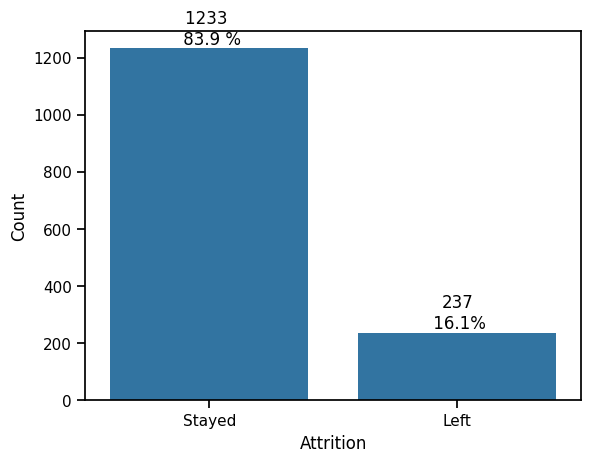

In [44]:
sns.countplot(x='Attrition', data=data)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks([0,1], ['Stayed', 'Left'])
plt.annotate(f'{data["Attrition"].value_counts()[0]} \n {round(data["Attrition"].value_counts()[0]/len(data)*100,1)} %', (0, data["Attrition"].value_counts()[0]), ha='center', va='bottom')
plt.annotate(f'{data["Attrition"].value_counts()[1]}\n {round(data["Attrition"].value_counts()[1]/len(data)*100,1)}%', (1, data["Attrition"].value_counts()[1]), ha='center', va='bottom')

plt.show()
plt.show()

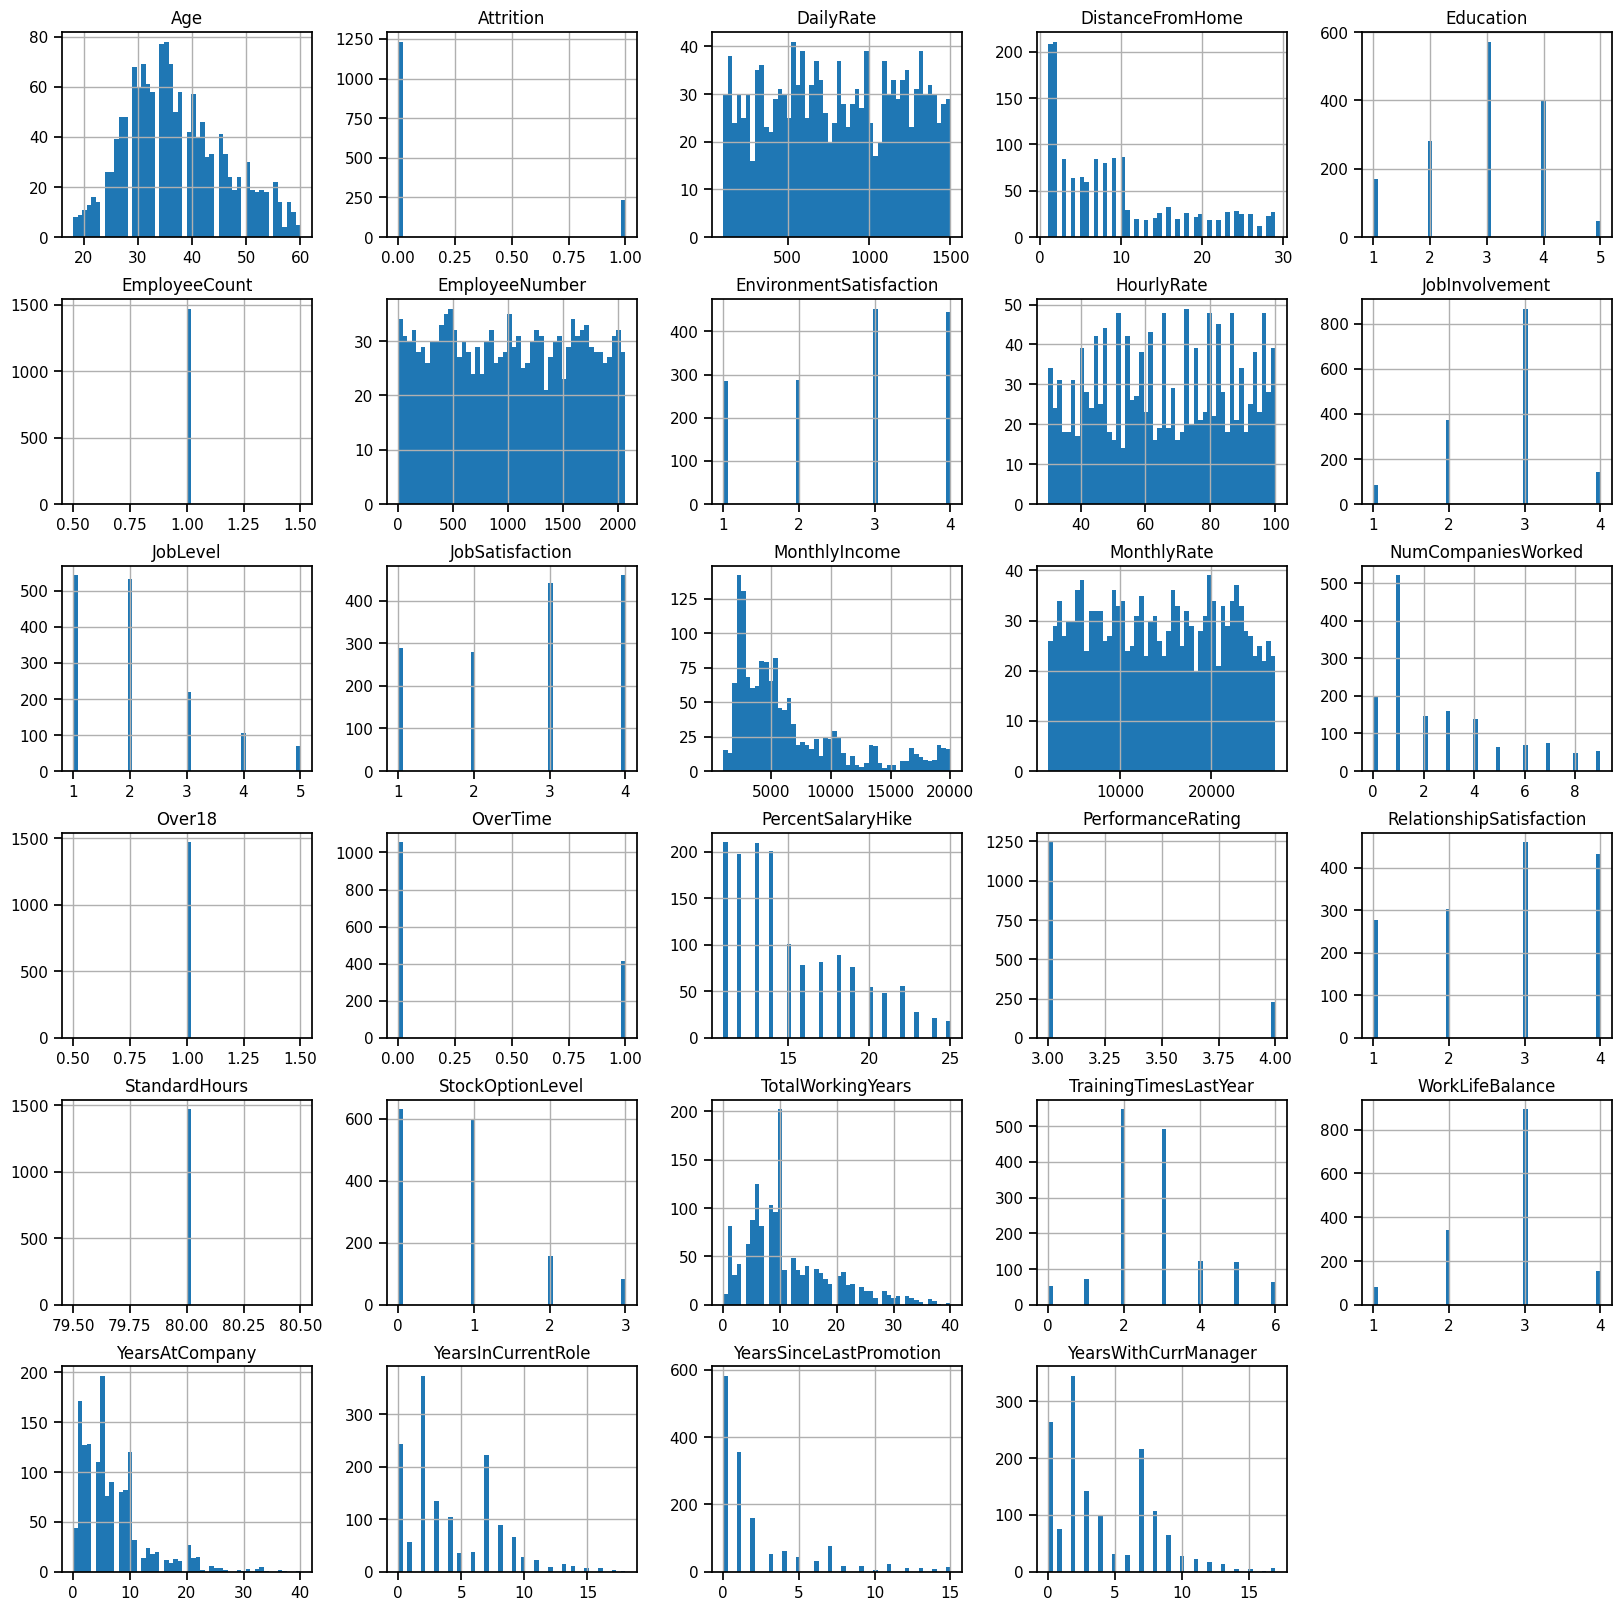

In [45]:
#Avaliação de histogramas para variáveis numéricas
data.hist(figsize=(20,20), bins=50)
plt.show()

Temos 3 colunas que nã possuem variabilidade entre funcionários, e por isso podem ser excluídas de análises futuras.


In [46]:
data.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis="columns", inplace=True)

Agora podemos avaliar quantos empregados sairam da empresa:


In [48]:
left_df = data[data['Attrition'] == 1]
stayed_df = data[data['Attrition'] == 0]
print(f'Total de Empregados: {len(data)}\n')
print(f'Empregados que sairam: {data["Attrition"].value_counts()[1]}')
print(f'% de empregados que sairam: {round(data["Attrition"].value_counts()[1]/len(data)*100,2)}%\n')
print(f'Empregados que permaneceram: {data["Attrition"].value_counts()[0]}')
print(f'% de empregados que permaneceram: {round(data["Attrition"].value_counts()[0]/len(data)*100,2)}%')


Total de Empregados: 1470

Empregados que sairam: 237
% de empregados que sairam: 16.12%

Empregados que permaneceram: 1233
% de empregados que permaneceram: 83.88%


Seguiremos com uma análise dos empregados que permanecem na empresa e dos que sairam, buscando assim realizar uma comparação entre esses dois grupos.

In [52]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [53]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


Entre os funcionários que saíram, a maioria estava satisfeita com seu trabalho, com 53% avaliando sua satisfação no trabalho como Boa ou Excelente, enquanto 28% estavam menos satisfeitos com seu trabalho.

<Axes: xlabel='DistanceFromHome', ylabel='Count'>

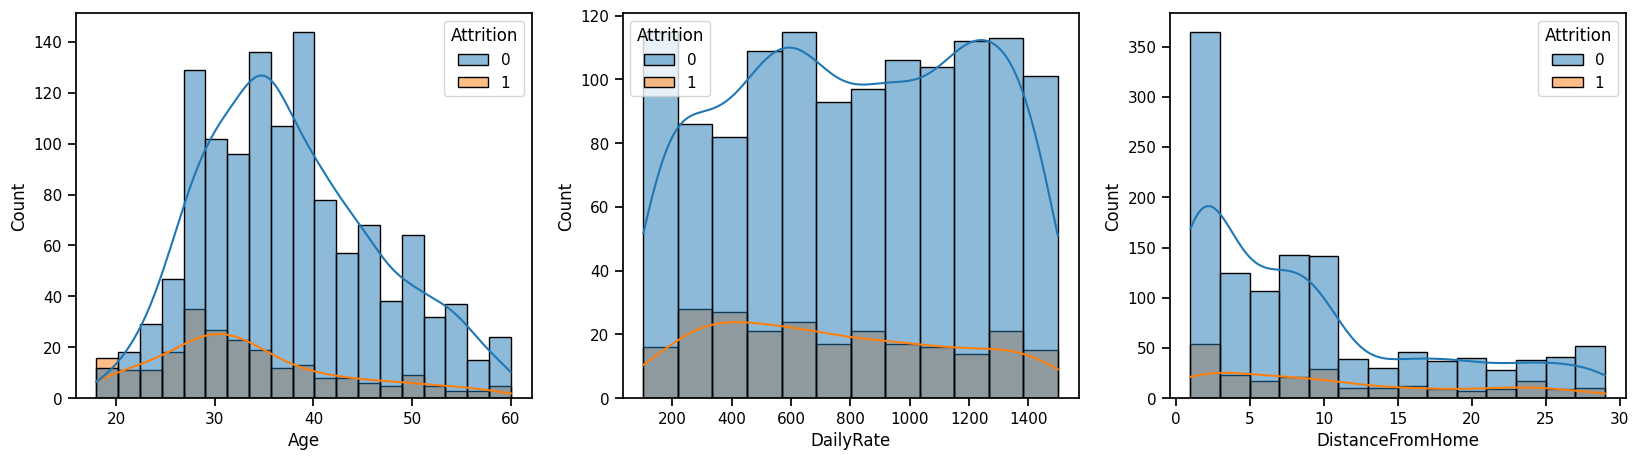

In [54]:
#Histograma comparativo enrtre quem saiu e quem permanceu
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(data, x='Age', hue='Attrition', kde=True, ax=ax[0])
sns.histplot(data, x='DailyRate', hue='Attrition', kde=True, ax=ax[1])
sns.histplot(data, x='DistanceFromHome', hue='Attrition', kde=True, ax=ax[2])

Notamos que o nível do cargo está fortemente correlacionado com o total de horas trabalhadas. A renda mensal está fortemente correlacionada com o nível do cargo e ao total de horas trabalhadas. e ainda que a idade está correlacionada a renda mensal.

<Axes: >

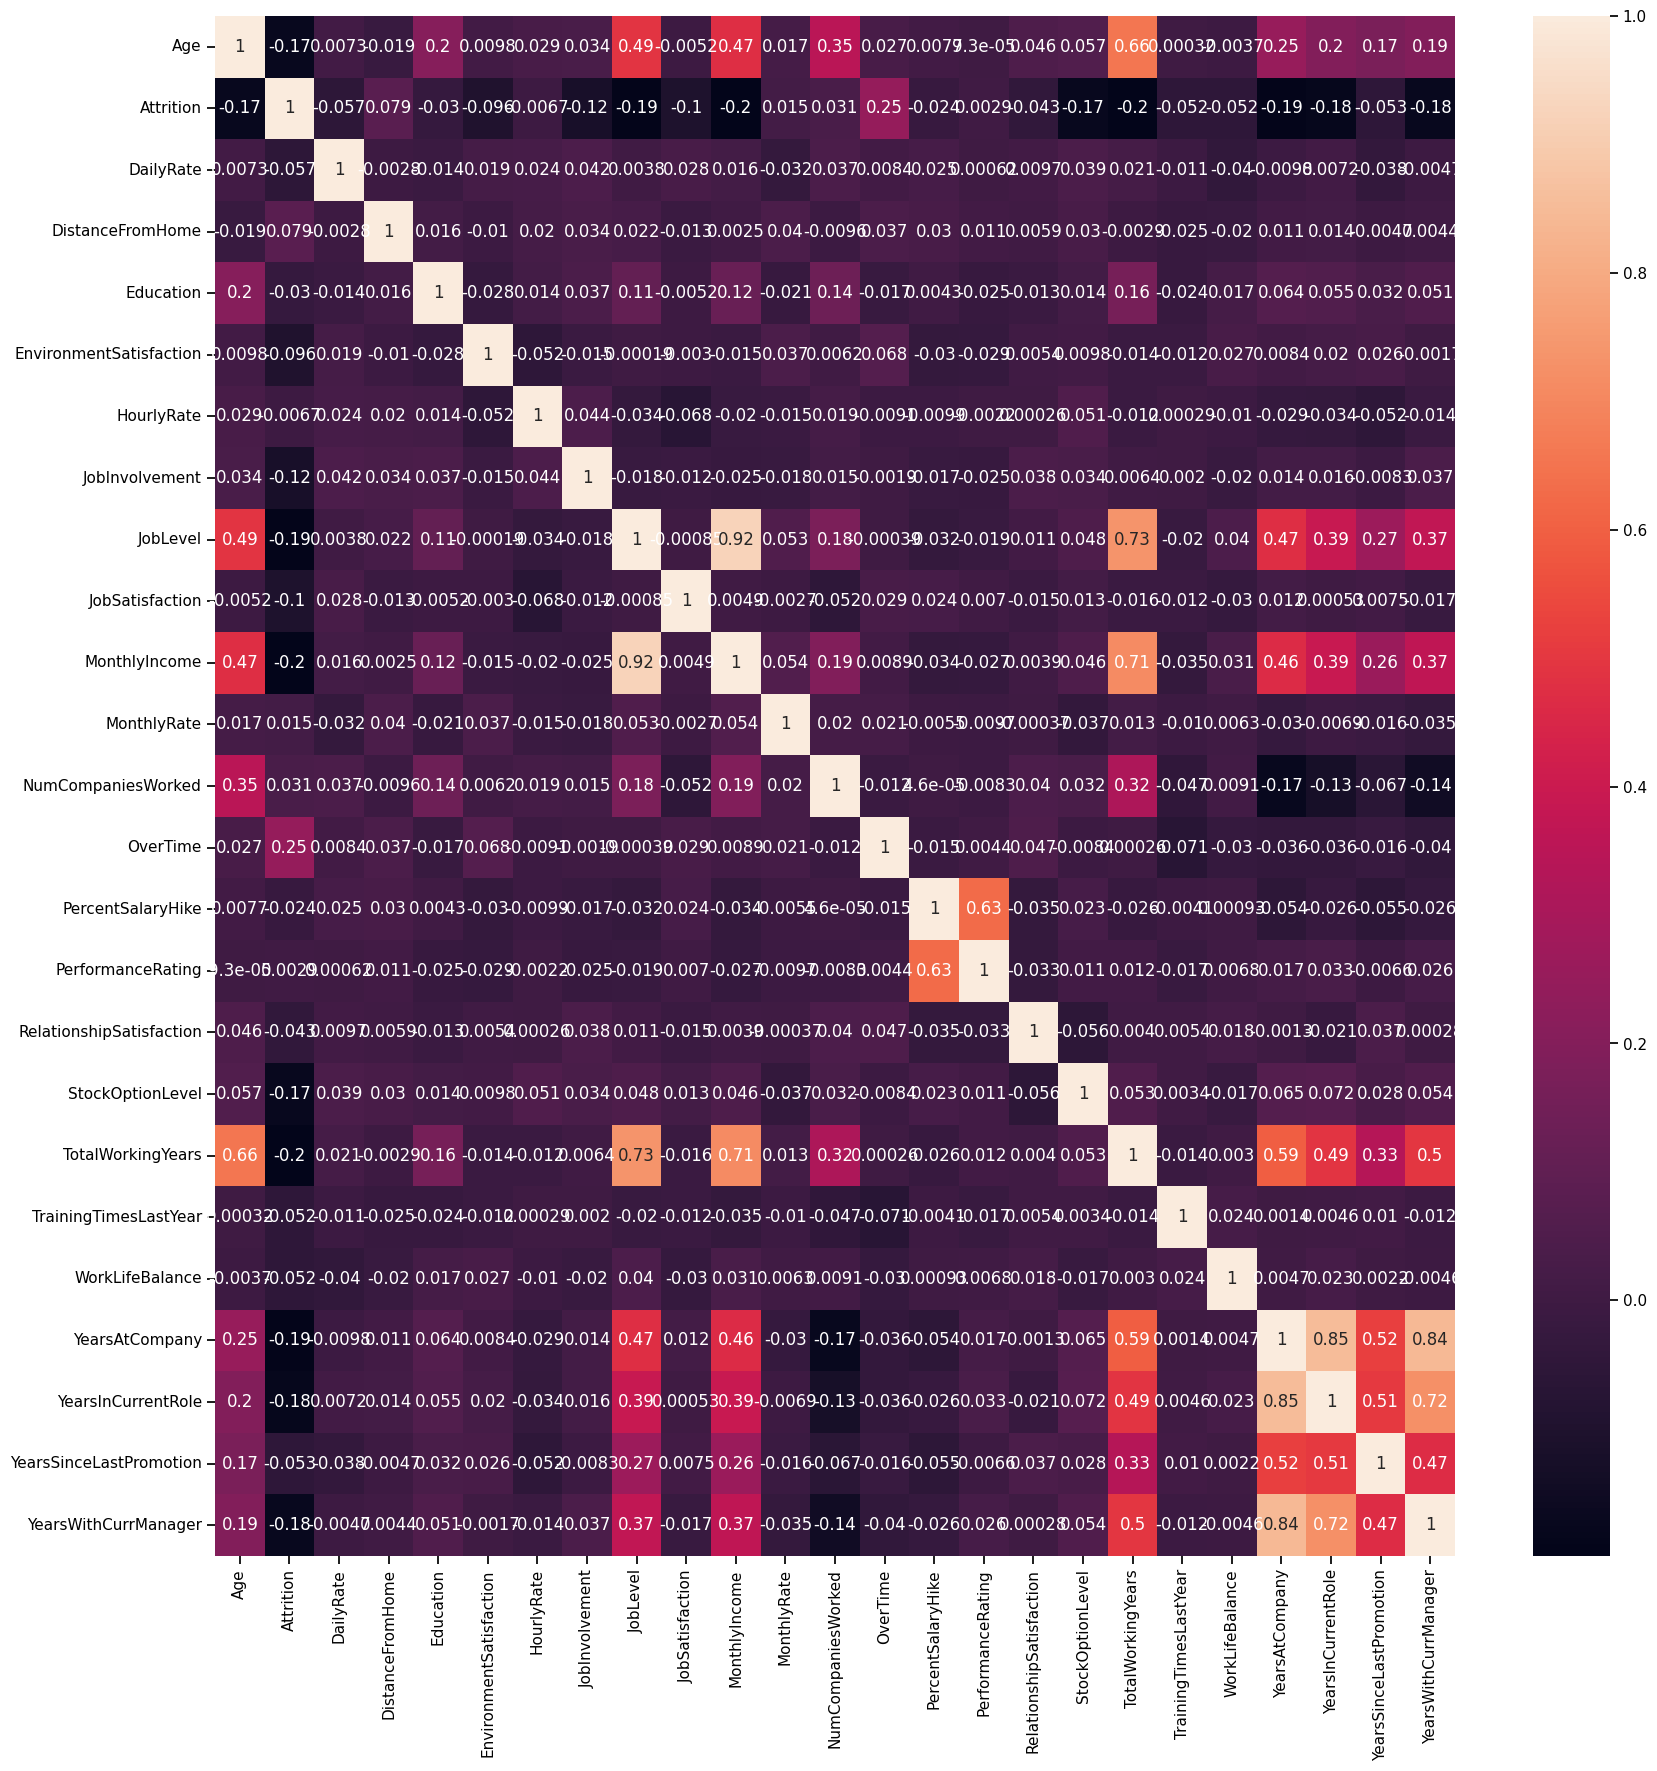

In [57]:
#Usaremos o Coeficiente de Correlação de Spearman, pois estamos lidando com dados não paramétricos (não normalmente distribuídos).
correlations = data.corr(numeric_only=True, method='spearman')

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True)


<Axes: xlabel='Age', ylabel='count'>

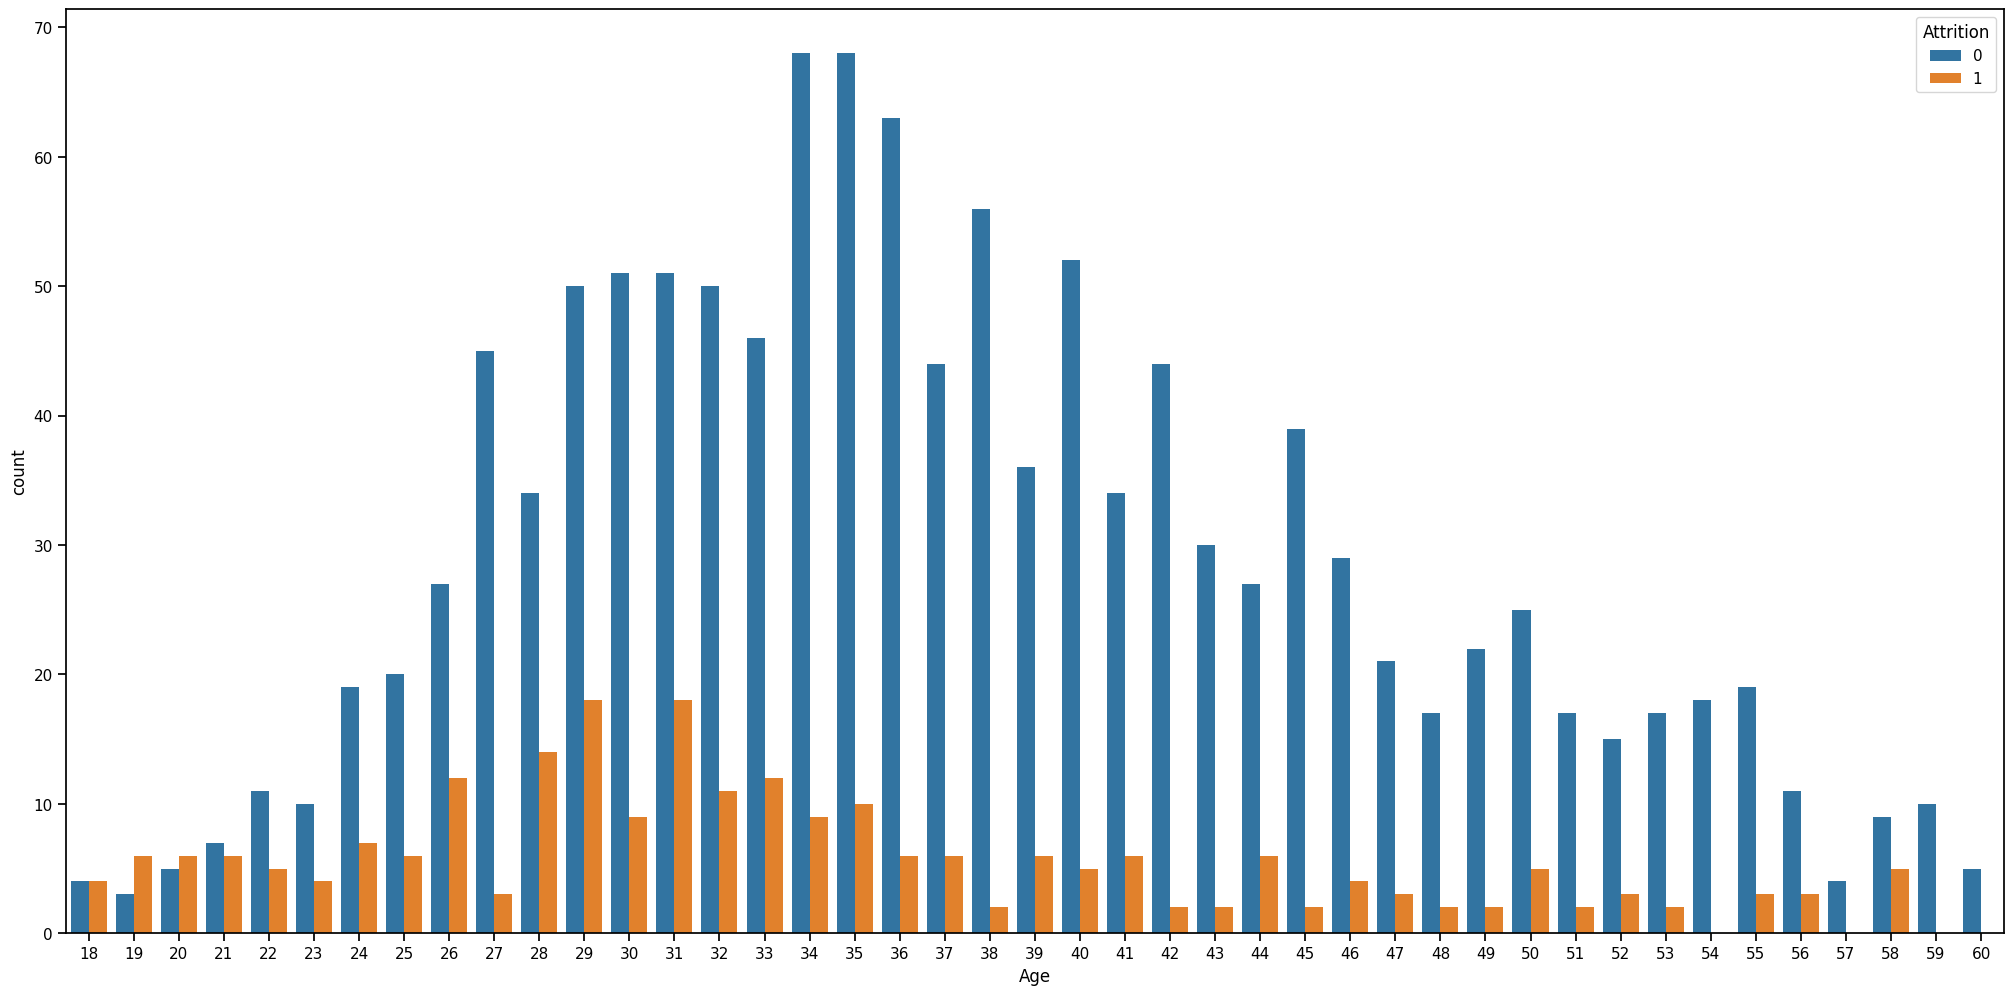

In [58]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = data)

<Axes: xlabel='JobLevel', ylabel='count'>

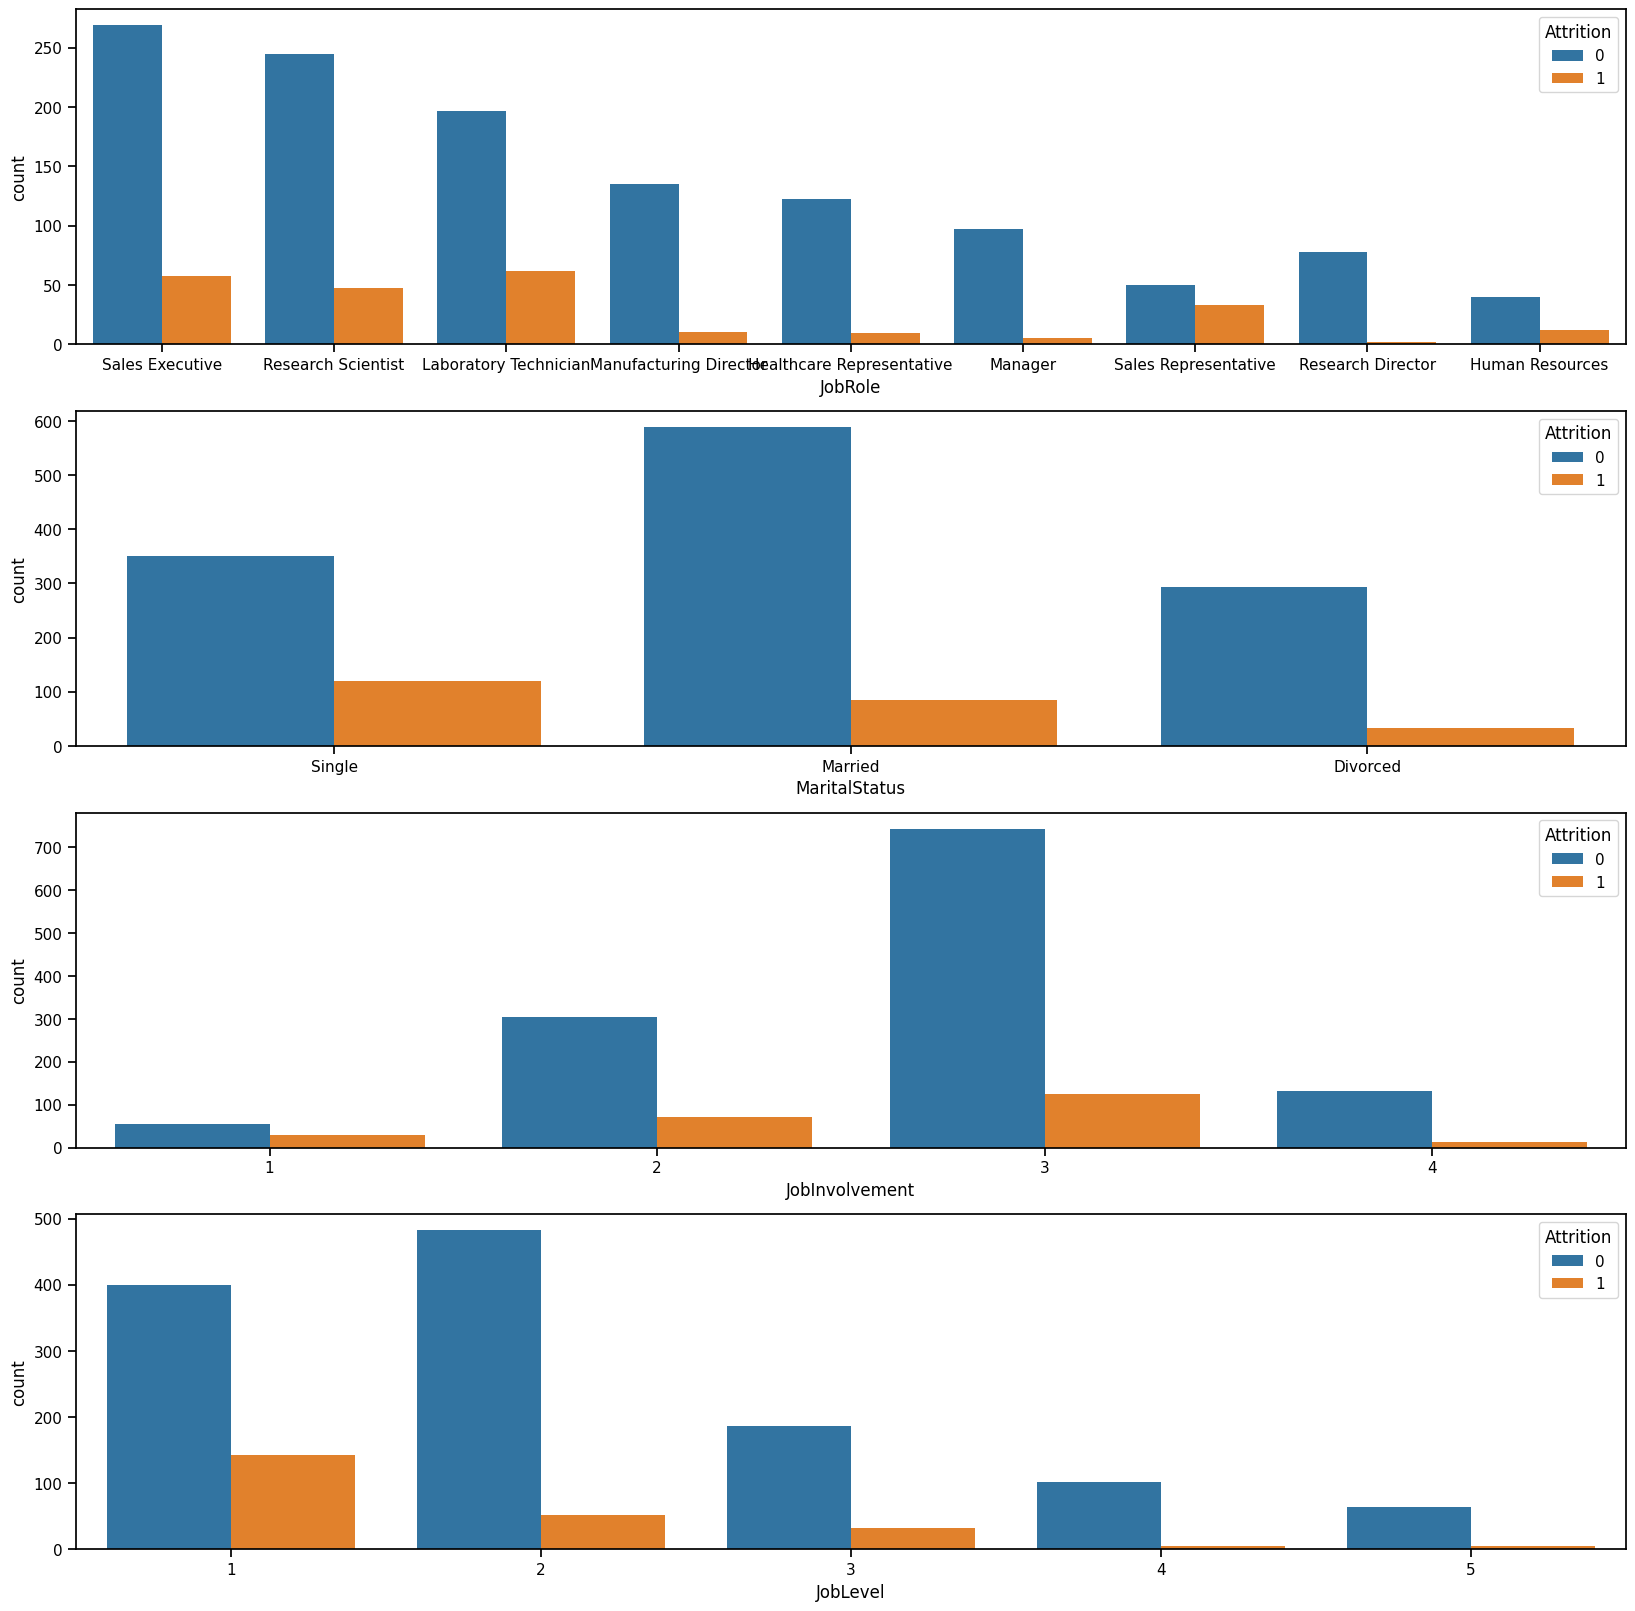

In [59]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = data)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = data)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = data)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = data)

Pode-se notar que os funcionários solteiros tem uma maior tendência de sair da empresa, quando comparados com casados ou divorciados.
O cargo que mais sai da empresa é o de representante de vendas. Funcionários com menos experiência e menos engajado também possuem maior tendência de saída.


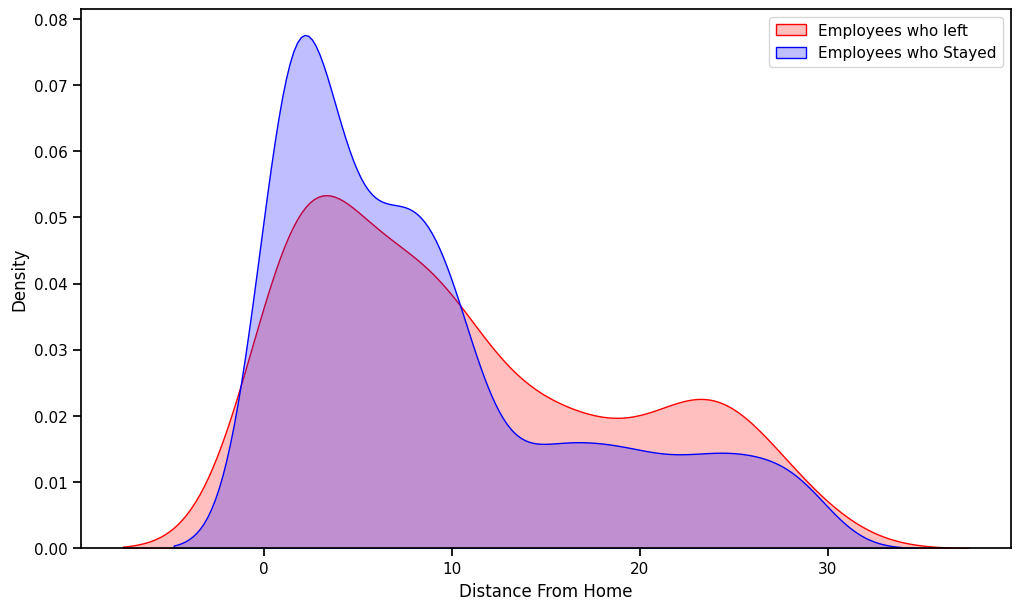

In [60]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['DistanceFromHome'], label='Employees who left', fill=True, color='r')
sns.kdeplot(stayed_df['DistanceFromHome'], label='Employees who Stayed', fill=True, color='b')
plt.xlabel('Distance From Home')
plt.legend()

Outro dado interessante, está na distância entre a residência do empregado e a empresa, onde notamos que em geral, os funcionários que sairam moram mais distantes do escritório.

Outra análise válida é a comparação em anos com o mesmo gestor, feita abaixo

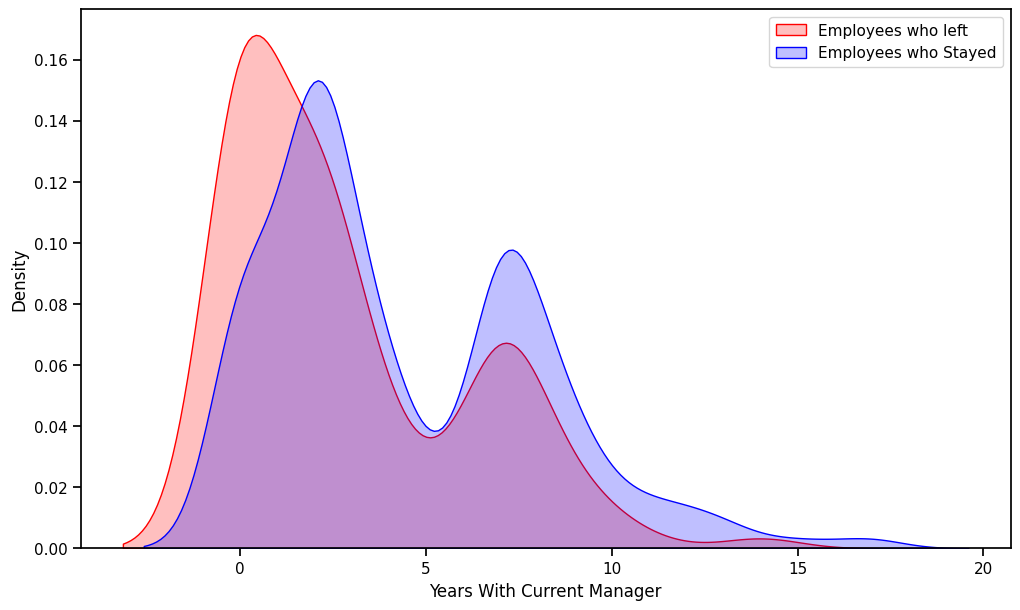

In [62]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['YearsWithCurrManager'], label='Employees who left', fill=True, color='r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label='Employees who Stayed', fill=True, color='b')
plt.xlabel('Years With Current Manager')
plt.legend()

Também nouto-se a necessidade de comparar os salários de homens e mulheres, bem como uma comparação entre salários e cargos.

<Axes: xlabel='Gender', ylabel='MonthlyIncome'>

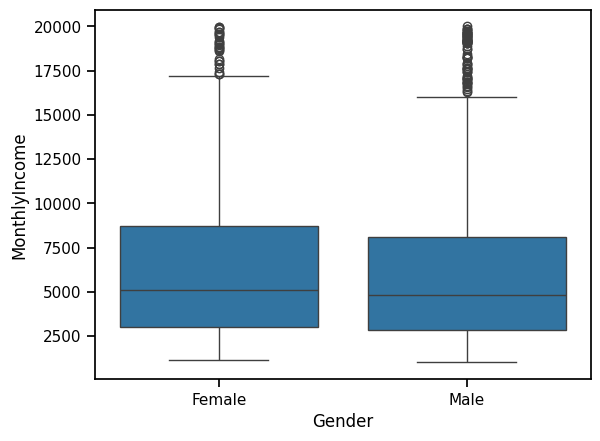

In [63]:
#comparação salarial por gênero
sns.boxplot(x='Gender', y='MonthlyIncome', data=data)

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

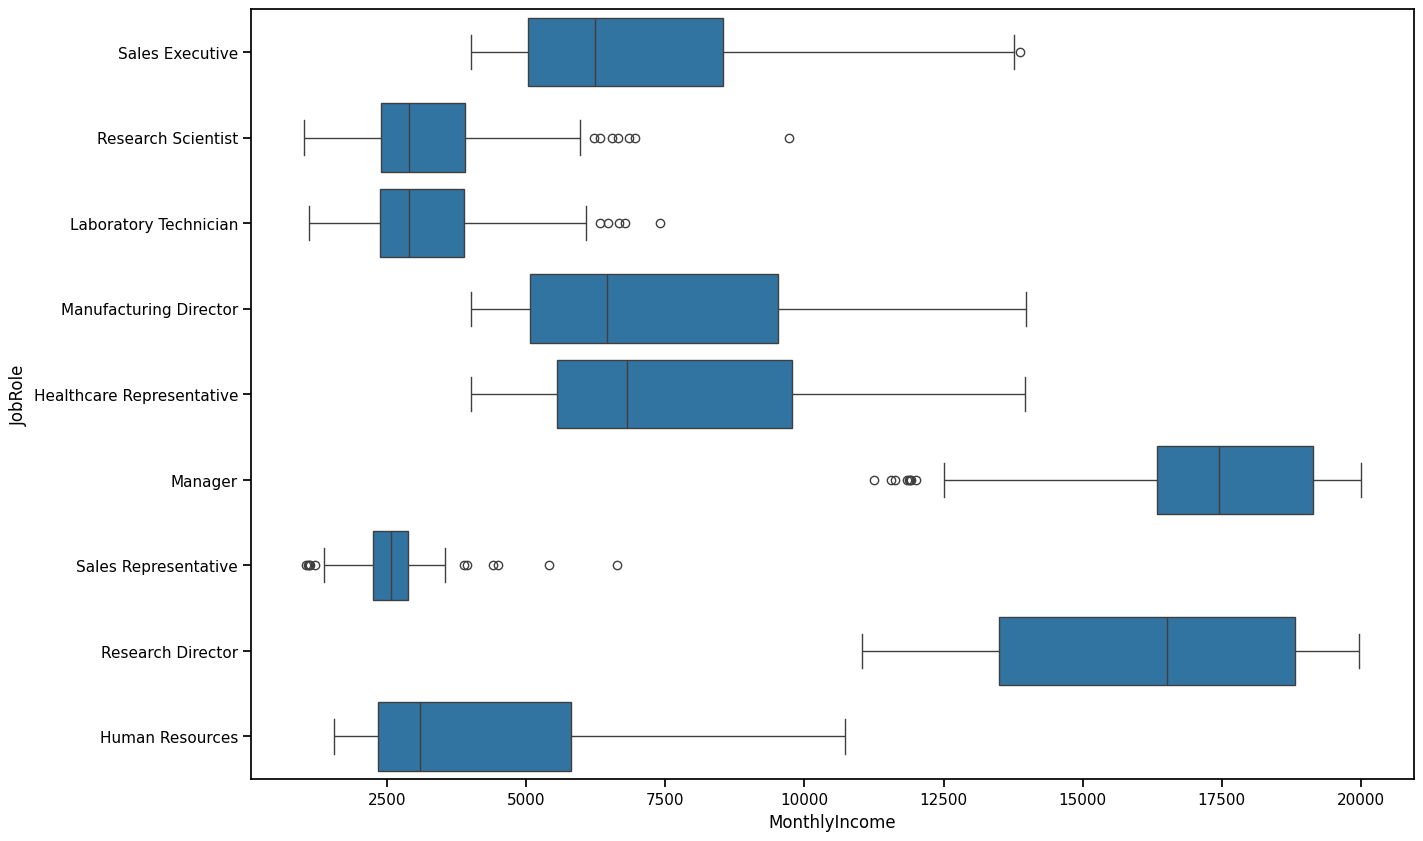

In [64]:
# Salários por cargos
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=data)

Alguns insights que podemos ter através dos dados avaliados acima:

* BusinessTravel: Os funcionários que viajam muito têm mais probabilidade de sair do que outros funcionários.

* Departmento: Os trabalhadores no setor de Pesquisa e Desenvolvimento têm mais probabilidade de permanecer do que os trabalhadores em outros departamentos.

* Campo de Educação: Os trabalhadores com Recursos Humanos e formação Técnica têm mais probabilidade de sair do que os funcionários de outros campos de educação.

* Sexo: Os homens têm mais probabilidade de sair.

* Cargo: Os trabalhadores em Técnico de Laboratório, Representante de Vendas e Recursos Humanos têm mais probabilidade de sair do que os trabalhadores em outros cargos.

* Estado Civil: Os funcionários solteiros têm mais probabilidade de sair do que os casados e divorciados.

* Horas Extras: A taxa de rotatividade é quase igual.

## 4. Limpeza e Pré-Processamento de Dados

Algumas colunas nos dados possuem valores numéricos que representam categorias, como Educação, que possui valores de 1 a 5 representando diferentes níveis de educação. Essas colunas foram convertidas em variáveis categóricas para realizar testes de significância para seleção de características. Em seguida, foram removidas as colunas com variância zero dos dados, pois estas podem levar a erros no ajuste do modelo. Por fim, para reduzir a assimetria nos dados, foi feita uma transformação logarítmica nas variáveis que apresentavam uma assimetria acima de 0.75.

In [67]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
#Separating all categorical data from the dataset
X_cat = data[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat = ohe.fit_transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)
#assigning column names
X_cat.columns = ohe.get_feature_names_out(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])

X_cat


,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [68]:
X_num = data[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
              'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
              'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
              'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

X_all = pd.concat([X_num, X_cat], axis=1)

X_cat.shape

(1470, 26)

In [69]:
X_all

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,591,2,1,1,40,3,1,2,3468,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,613,6,1,4,42,2,3,1,9991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,155,4,3,2,87,4,2,2,6142,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### 4.1 Escalonamento de dados


In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_all)

### 4.2 Base de Treino e Teste



In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['Attrition'], test_size=0.25)

### 4.3 Balanceamento de classes


In [74]:
#Balanceamento do dataset data['Attrition'] ==1
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, sampling_strategy='minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

from imblearn.over_sampling import RandomOverSampler

# Oversampling Aleatório
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

from imblearn.combine import SMOTETomek

# Amostragem aleatória
smotetomek = SMOTETomek(random_state=0)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)

## 5. Modelo Preditivo

### 5.1 Regressão Logística

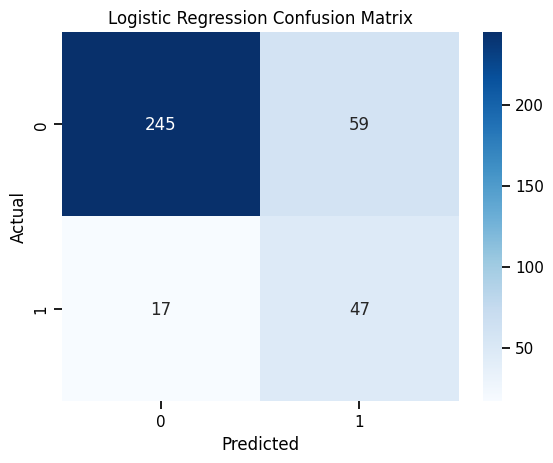

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       304
           1       0.44      0.73      0.55        64

    accuracy                           0.79       368
   macro avg       0.69      0.77      0.71       368
weighted avg       0.85      0.79      0.81       368



In [75]:
from sklearn.linear_model import LogisticRegression

lreg_model = LogisticRegression()
lreg_model.fit(X_train_smote, y_train_smote)

lreg_model.score(X_test, y_test)

from sklearn.metrics import confusion_matrix, classification_report

y_pred = lreg_model.predict(X_test)
lreg_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(lreg_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

### 5.2 Classificador para Random Forest

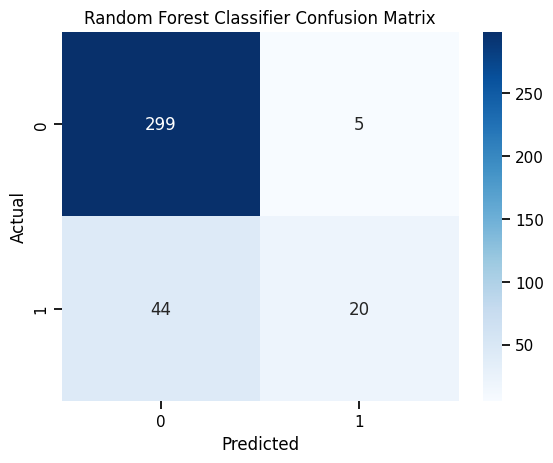

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       304
           1       0.80      0.31      0.45        64

    accuracy                           0.87       368
   macro avg       0.84      0.65      0.69       368
weighted avg       0.86      0.87      0.84       368



In [76]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train_smote, y_train_smote)

rfc_model.score(X_test, y_test)

y_pred = rfc_model.predict(X_test)
rfc_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(rfc_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

### 5.3 XGBoost

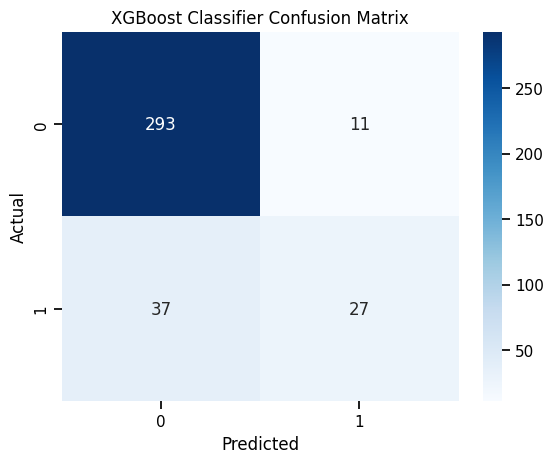

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       304
           1       0.71      0.42      0.53        64

    accuracy                           0.87       368
   macro avg       0.80      0.69      0.73       368
weighted avg       0.86      0.87      0.86       368



In [77]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_smote, y_train_smote)

xgb_model.score(X_test, y_test)

y_pred = xgb_model.predict(X_test)
xgb_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(xgb_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Classifier Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

### 5.4 Classificador de Rede Neural Artificial (RNA ou ANN)

In [79]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train_smote.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_smote, y_train_smote, epochs=40, batch_size=8)

model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

Epoch 1/40
233/233 [==============================] - 1s 2ms/step - loss: 0.5776 - accuracy: 0.7056
Epoch 2/40
233/233 [==============================] - 1s 3ms/step - loss: 0.4392 - accuracy: 0.8019
Epoch 3/40
233/233 [==============================] - 1s 5ms/step - loss: 0.3811 - accuracy: 0.8299
Epoch 4/40
233/233 [==============================] - 1s 3ms/step - loss: 0.3296 - accuracy: 0.8558
Epoch 5/40
233/233 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8773
Epoch 6/40
233/233 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.9015
Epoch 7/40
233/233 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9247
Epoch 8/40
233/233 [==============================] - 0s 2ms/step - loss: 0.1723 - accuracy: 0.9386
Epoch 9/40
233/233 [==============================] - 0s 2ms/step - loss: 0.1381 - accuracy: 0.9548
Epoch 10/40
233/233 [==============================] - 0s 2ms/step - loss: 0.1083 - accuracy: 0.9736

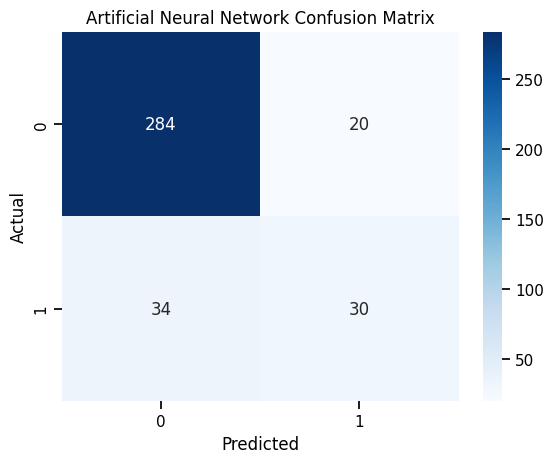

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       304
           1       0.60      0.47      0.53        64

    accuracy                           0.85       368
   macro avg       0.75      0.70      0.72       368
weighted avg       0.84      0.85      0.85       368



In [80]:
ann_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(ann_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Artificial Neural Network Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

12/12 [==============================] - 0s 2ms/step


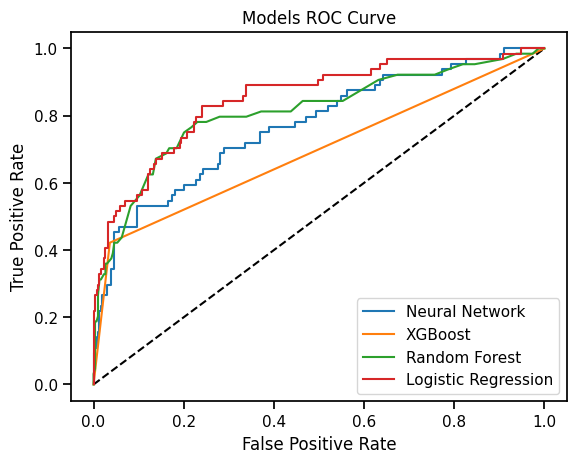

In [81]:
from sklearn.metrics import roc_curve
#Seguimos com a plotagem dos diferentes modelos em uma mesma figura, onde cada cor de linha representa um modelo diferente

y_pred_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Models ROC Curve')

y_pred_prob = xgb_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='XGBoost')

y_pred_prob = rfc_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Random Forest')

y_pred_prob = lreg_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression')

plt.legend()
plt.show()

## Conclusão

Nesta análise, notamos que 16% dos funcionários deixaram a empresa no trimestre anterior, sendo que mais da metade saiu do departamento de Pesquisa e Desenvolvimento. Entre as mulheres, a maior rotatividade ocorreu no departamento de Recursos Humanos. Cerca de 1 em cada 4 trabalhadores com o menor equilíbrio entre vida pessoal e profissional deixaram a empresa, embora a maioria dos funcionários que saíram tenha classificado sua satisfação no trabalho como boa ou excelente. Entre os ex-funcionários, o salário foi significativamente menor, com uma renda mensal mediana cerca de US$ 2.000 menor do que a dos funcionários atuais. Variáveis que não foram significativas para determinar se um funcionário saiu incluem seu nível de educação, avaliação de desempenho e gênero.

O modelo de Random Forest (RFC) e a Regressão Logística (LR) apresentaram a melhor curva ROC de todos os modelos. No entanto, a LR mostrou um recall muito melhor para a classe minoritária (0,84). Mesmo com o balanceamento do SMOTE, os modelos mostraram uma baixa Taxa de Verdadeiros Positivos para a classe minoritária. Isso provavelmente se deve às classes desbalanceadas e à falta de dados para treinar o modelo, mas, como isso depende do número de funcionários da empresa, teremos que optar pelo modelo LR, pois mostrou os melhores resultados de todos. Por outro lado, neste caso, damos mais importância à previsão correta da rotatividade de funcionários e não nos importamos muito com os falsos positivos (funcionários previstos como saindo da empresa, mas que na verdade permanecem).